In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
c = pd.read_csv('../data/classification.csv')

In [2]:
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


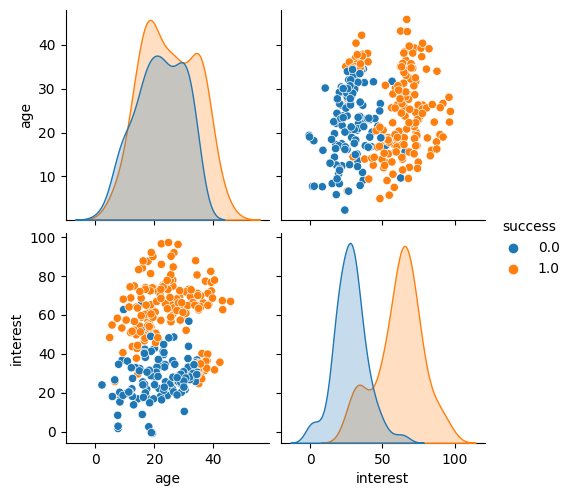

In [3]:
sns.pairplot(hue='success', data=c);

In [4]:
from sklearn.model_selection import train_test_split
x = c[['age', 'interest']]
y = c['success']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(207, 2) (90, 2) (207,) (90,)


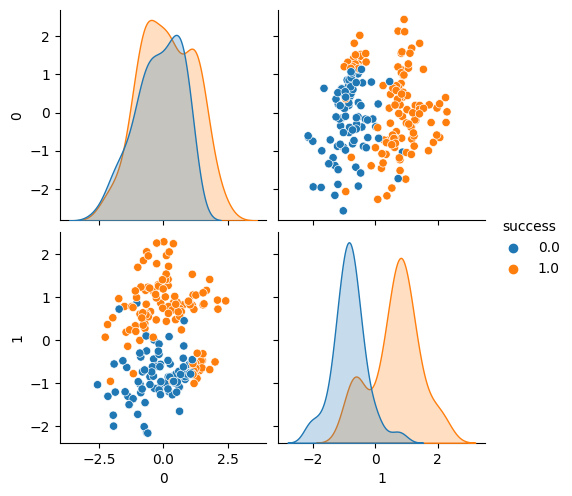

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

sns.pairplot(data=pd.concat([pd.DataFrame(train_x),
                            train_y.reset_index(drop=True)], axis=1),
            hue='success')


In [6]:
from sklearn.svm import SVC
clf = SVC(C=0.5, random_state=45)
clf.fit(train_x, train_y)

SVC(C=0.5, random_state=45)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

test_x_scaled = scaler.transform(test_x)

pred = clf.predict(test_x_scaled)

print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))


[[37  2]
 [ 2 49]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        39
         1.0       0.96      0.96      0.96        51

    accuracy                           0.96        90
   macro avg       0.95      0.95      0.95        90
weighted avg       0.96      0.96      0.96        90



C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


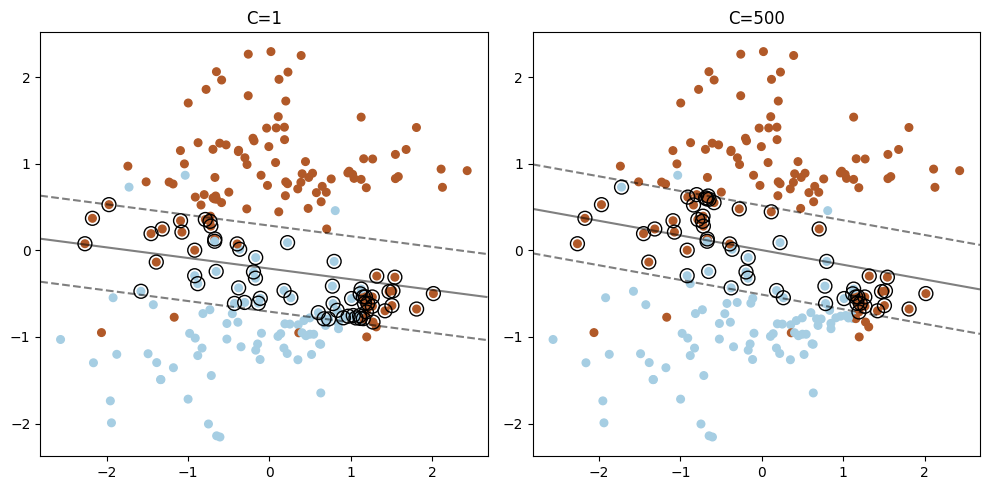

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss='hinge', random_state=42).fit(train_x, train_y)
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]
    
    plt.subplot(1, 2, i + 1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx, yy, Z,
        colors='k',
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=['--', '-', '--'])
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors='none',
        edgecolors='k'
    )
    plt.title('C=' + str(C))
plt.tight_layout()
plt.show()

## SVR

In [16]:
import numpy as np

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.04867865]
 [0.33139635]
 [0.35030724]
 [0.400096  ]
 [0.42160273]
 [0.44338487]] 

 [0.04865943 0.32536371 0.3431864  0.38950677 0.40922336 0.42899948
 0.57892056 0.70008273 0.75895304 0.76683072]


In [17]:
y[::5] += 3 * (0.5 - np.random.rand(8))
print(y[0:10])


[-1.41398618  0.32536371  0.3431864   0.38950677  0.40922336 -0.68245799
  0.57892056  0.70008273  0.75895304  0.76683072]


In [20]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [25]:
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evals = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evals)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)    
    results.loc[nm]['mae'] = round(mae, 2)
    
results

,mse,rmse,mae
Random_Forest,0.16,0.41,0.23
Linear,0.48,0.69,0.5
Polynomial,0.15,0.39,0.22


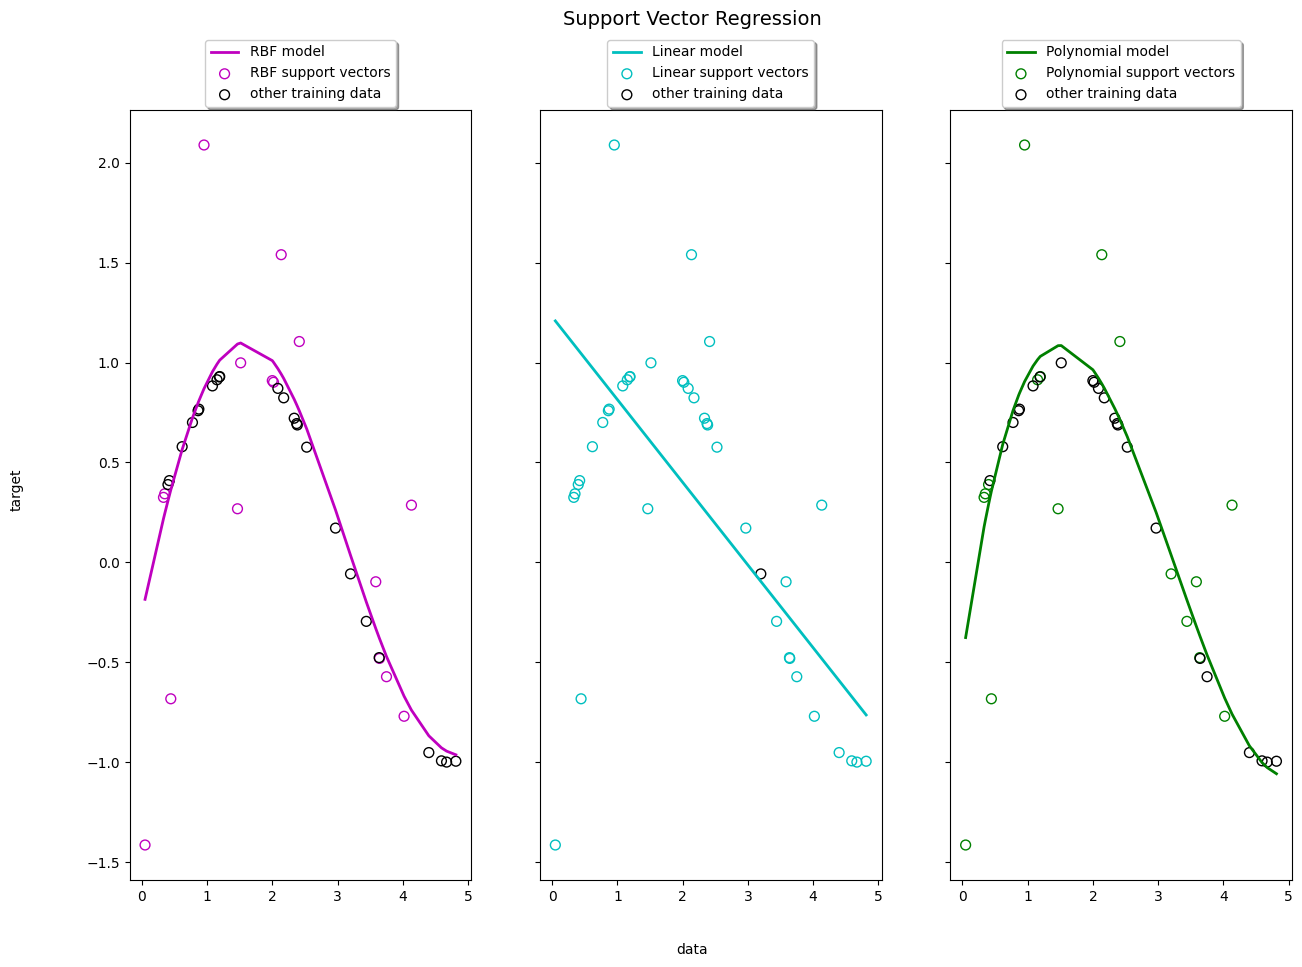

In [30]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label='{} model'.format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor='none',
        edgecolor=model_color[ix],
        s=50,
        label='{} support vectors'.format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor='none',
        edgecolor='k', 
        s=50,
        label='other training data',
    )
    axes[ix].legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True
    )
    
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.05, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Support Vector Regression', fontsize=14)
plt.show()

